In [53]:
import pyuvdata
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [54]:
eq_coeffs_mat = scipy.io.loadmat("/home/pipeline/opsdata/20241213-settingsAll-day.mat")
print(eq_coeffs_mat.keys())
print(eq_coeffs_mat["eq4"])  # Which antennas use that set of equalization coefficients
#print(eq_coeffs_mat["antNames"])  # Antenna ordering

dict_keys(['__header__', '__version__', '__globals__', 'adrs', 'antNames', 'coef', 'comment', 'delay_dsig', 'eq0', 'eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'exclude', 'fftShift', 'settings', 'sigtab', 'time'])
[[132 133 136 137 138 139 140 141 142 143 144 145 146 147 150 151 152 153
  154 155 156 157 158 159 320 321 326 327 332 333 334 335 336 337 338 339
  344 345 346 347 350 351 362 363 364 365 368 369 370 371 372 373 512 513
  514 515 516 517 528 529 530 531 532 533 534 535 542 543 548 549 550 551
  552 553 554 555 556 557 558 559 560 561 566 567 590 591 604 605 606 607
  608 609 610 611 614 615]]


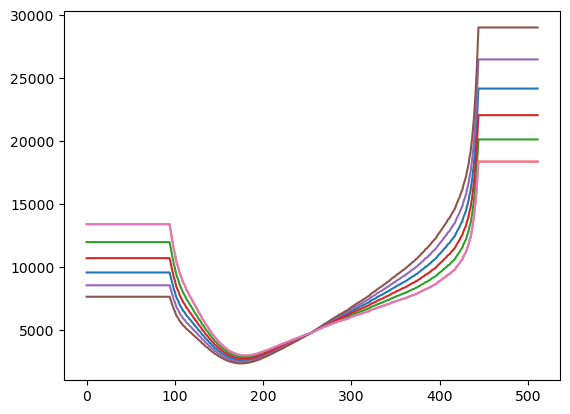

In [55]:
for ind in range(7):
    eq_coeffs = eq_coeffs_mat["coef"][ind, :]
    plt.plot(eq_coeffs)

In [56]:
np.shape(eq_coeffs_mat["coef"])

(7, 512)

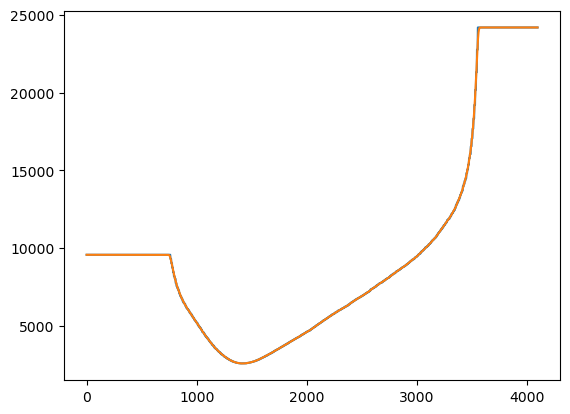

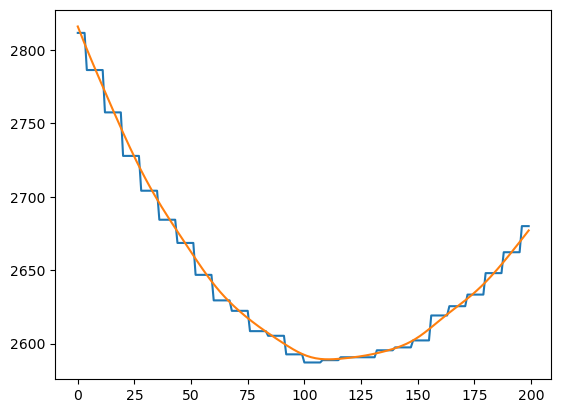

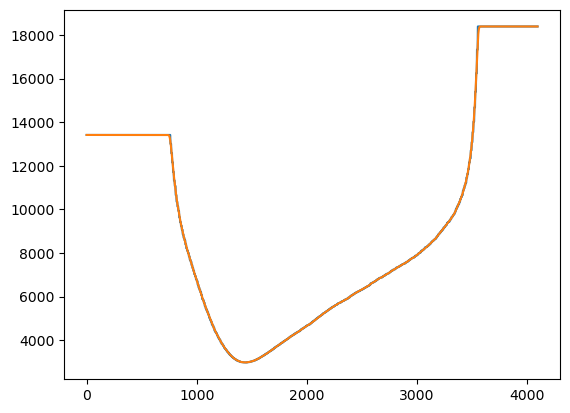

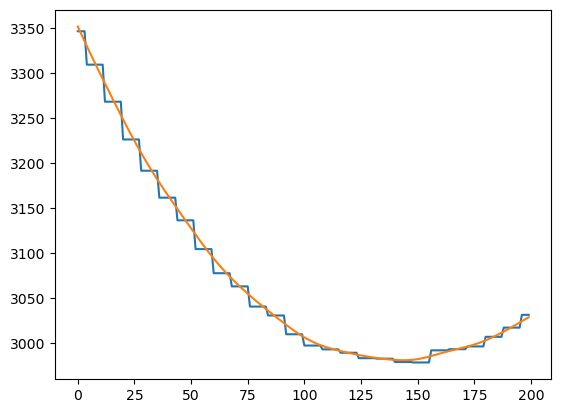

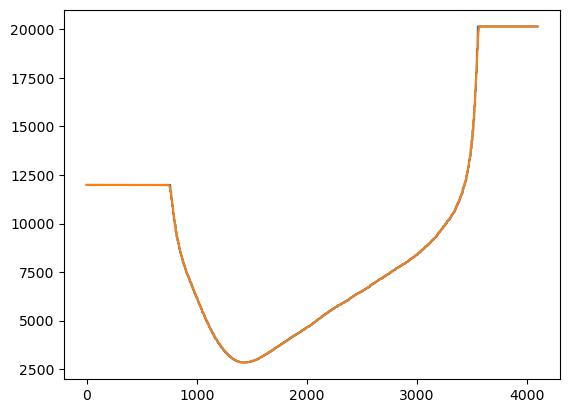

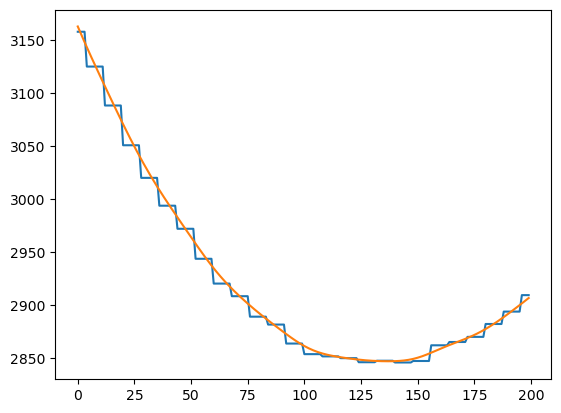

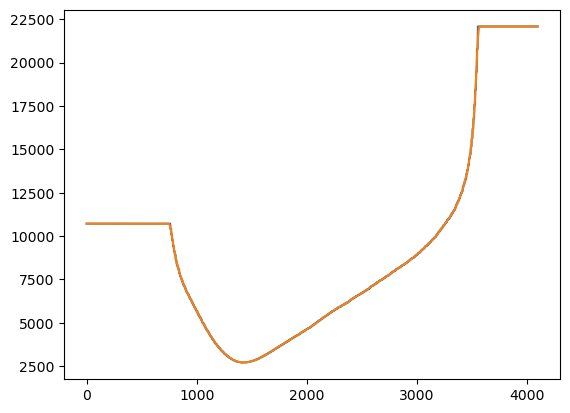

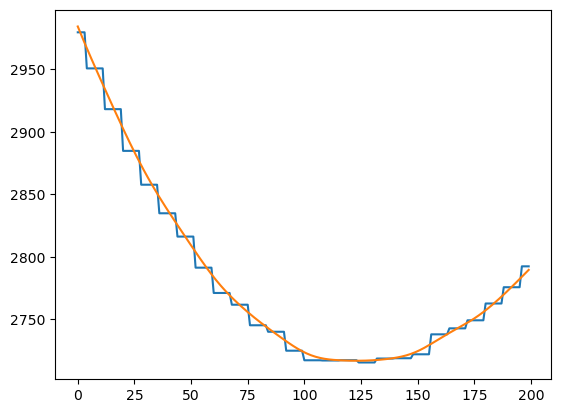

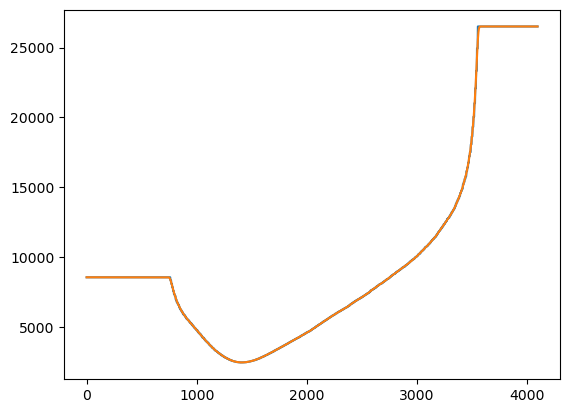

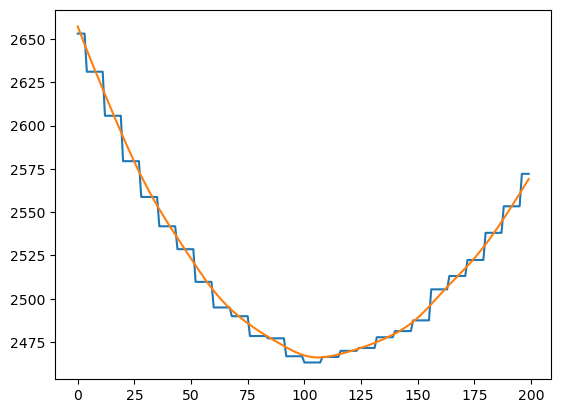

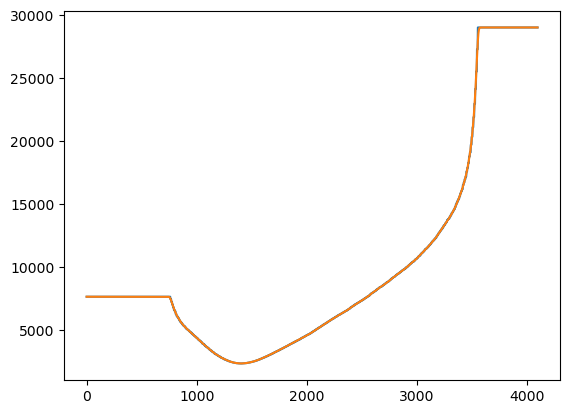

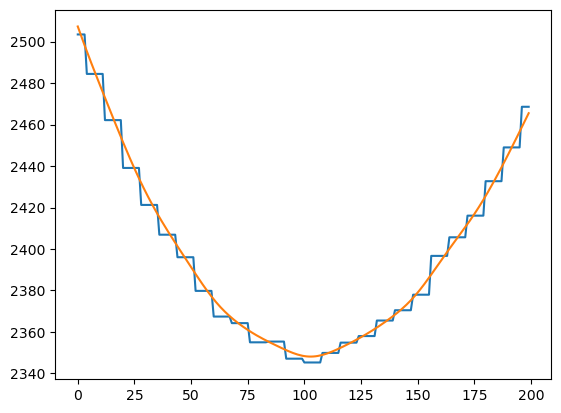

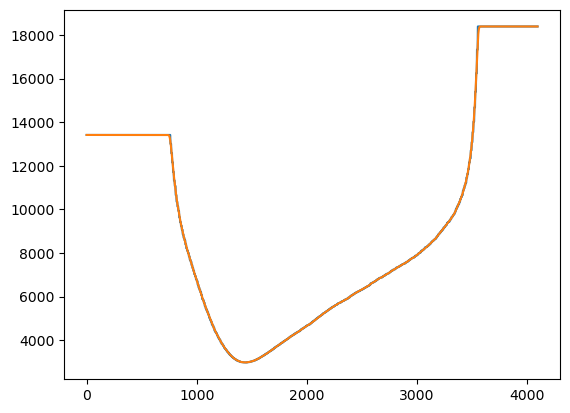

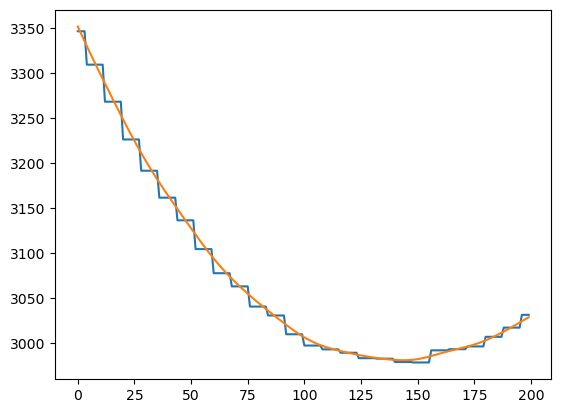

In [57]:
eq_coeffs_new = np.zeros((7, 512*8), dtype=float)
for ind in range(7):
    eq_coeffs = eq_coeffs_mat["coef"][ind, :]
    eq_coeffs = np.repeat(eq_coeffs, 8)
    gaussian = scipy.signal.windows.gaussian(len(eq_coeffs), 8)
    eq_coeffs_smoothed = np.copy(eq_coeffs)
    for eq_ind in range(len(eq_coeffs)):
        start_ind = eq_ind - int(np.floor(len(gaussian)/2))
        end_ind = start_ind + len(gaussian)
        gaussian_start_ind = 0
        gaussian_end_ind = len(gaussian)
        if start_ind < 0:
            gaussian_start_ind = -1 * start_ind
            start_ind = 0
        if end_ind > len(gaussian):
            gaussian_end_ind = len(gaussian) - (end_ind - len(gaussian))
            end_ind = len(gaussian)
        smoothing_func = np.copy(gaussian[gaussian_start_ind:gaussian_end_ind])
        smoothing_func /= np.sum(smoothing_func)
        eq_coeffs_smoothed[eq_ind] = np.sum(eq_coeffs[start_ind:end_ind] * smoothing_func)
    eq_coeffs_new[ind, :] = eq_coeffs_smoothed
    plt.plot(eq_coeffs)
    plt.plot(eq_coeffs_smoothed)
    plt.show()
    
    plt.plot(eq_coeffs[1300:1500])
    plt.plot(eq_coeffs_smoothed[1300:1500])
    plt.show()

In [58]:
eq_coeffs_new[:, :] = 5000
eq_coeffs_new[:, 1500] = 10000
eq_coeffs_mat["coef"] = eq_coeffs_new

In [59]:
eq_coeffs_new = 20000*np.random.random(size=(7,4096))
min_val = 3000
max_val = 18000
eq_coeffs_new[:, :] = (np.arange(4096)[::-1]*(max_val-min_val)/4096 + min_val)[np.newaxis, :]
eq_coeffs_new = eq_coeffs_new/3 + (2/3)*np.mean(eq_coeffs_new)
eq_coeffs_mat["coef"] = eq_coeffs_new

In [60]:
eq_coeffs_new[0,1]-eq_coeffs_new[0,0]

-1.220703125

In [66]:
np.mean(eq_coeffs_new)

10498.1689453125

In [61]:
#scipy.io.savemat('/lustre/rbyrne/20250612-settingsAll-day_smoothed.mat', eq_coeffs_mat)
scipy.io.savemat('/lustre/rbyrne/20240922-settingsAll-day_linear_-1.mat', eq_coeffs_mat)

In [62]:
#eq_coeffs_polyfit = np.zeros((7,4096))
#for ind in range(7):
#    eq_coeffs_polyfit[ind,:] = np.polyval(np.polyfit(np.arange(4096), eq_coeffs_new[ind,:], 5), np.arange(4096))
#eq_coeffs_polyfit[np.where(eq_coeffs_polyfit > 20000)] = 20000
#eq_coeffs_mat["coef"] = eq_coeffs_polyfit
#scipy.io.savemat('/lustre/rbyrne/20240922-settingsAll-day_polyfit.mat', eq_coeffs_mat)

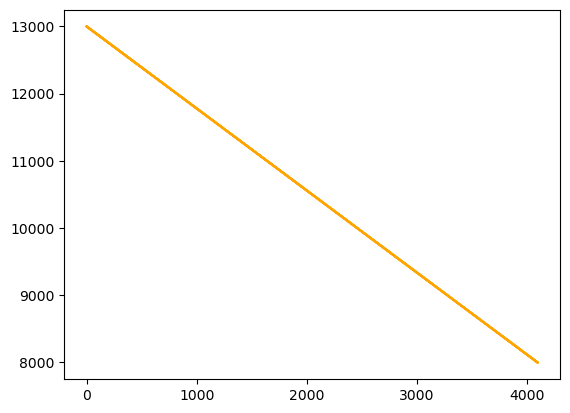

In [63]:
for ind in range(7):
    #plt.plot(eq_coeffs_polyfit[ind,:], color="blue")
    plt.plot(eq_coeffs_new[ind,:], color="orange")

In [64]:
np.max(eq_coeffs_new)

12997.55859375

In [65]:
# Check new file
eq_coeffs_mat_reread = scipy.io.loadmat("/lustre/rbyrne/20250612-settingsAll-day_smoothed.mat")
print(eq_coeffs_mat_reread.keys())
print(eq_coeffs_mat_reread["eq4"])  # Which antennas use that set of equalization coefficients
print(eq_coeffs_mat_reread["antNames"])  # Antenna ordering
print(np.shape(eq_coeffs_mat["coef"]))

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/rbyrne/20250612-settingsAll-day_smoothed.mat'

In [ ]:
# Set the value for one channel very high
#eq_coeffs_mat["coef"][0, 1500] = 50000
#scipy.io.savemat('/lustre/rbyrne/20250612-settingsAll-day_channel-test.mat', eq_coeffs_mat)

In [ ]:
print(len(eq_coeffs_mat["antNames"][eq_coeffs_mat["eq0"]][0]))

124


In [ ]:
print(len([antname for antname in eq_coeffs_mat["antNames"][eq_coeffs_mat["eq0"]][0] if antname.endswith("A")]))
print([antname for antname in eq_coeffs_mat["antNames"][eq_coeffs_mat["eq0"]][0] if antname.endswith("A")])

62
['LWA-012A', 'LWA-044A', 'LWA-043A', 'LWA-046A', 'LWA-045A', 'LWA-071A', 'LWA-047A', 'LWA-074A', 'LWA-073A', 'LWA-077A', 'LWA-075A', 'LWA-013A', 'LWA-016A', 'LWA-015A', 'LWA-014A', 'LWA-018A', 'LWA-017A', 'LWA-020A', 'LWA-019A', 'LWA-021A', 'LWA-048A', 'LWA-072A', 'LWA-101A', 'LWA-103A', 'LWA-102A', 'LWA-105A', 'LWA-104A', 'LWA-139A', 'LWA-108A', 'LWA-107A', 'LWA-143A', 'LWA-142A', 'LWA-144A', 'LWA-136A', 'LWA-140A', 'LWA-138A', 'LWA-141A', 'LWA-167A', 'LWA-166A', 'LWA-170A', 'LWA-234A', 'LWA-173A', 'LWA-171A', 'LWA-169A', 'LWA-204A', 'LWA-206A', 'LWA-205A', 'LWA-208A', 'LWA-207A', 'LWA-210A', 'LWA-209A', 'LWA-233A', 'LWA-236A', 'LWA-235A', 'LWA-238A', 'LWA-237A', 'LWA-240A', 'LWA-239A', 'LWA-254A', 'LWA-243A', 'LWA-242A', 'LWA-245A']
